# Capstone 3 - Data Wrangling

## 1. Introduction to the Dataset
The whisky dataset was retrieved by web scraping [Master of Malt](https://www.masterofmalt.com/) website. The dataset contains a 19,006 whisky data with majority of the data coming from Scotch, American, and Japanese whiskies. Summary information of its columns are shown below:

- **Name**: Name of Whisky
- **Description**: Whisky description
- **Price**: Approximate price in USD
- **Country**: Country of origin
- **Distillery**: Name of distiller
- **Bottler**: Name of bottler
- **Style**: Whisky style
- **Alcohol_content**: Alcohol content (%)
- **Volume**: Liquor volume (Centiliter - cl)
- **Nose**: Whisky's smell description
- **Palate**: Whisky's taste description
- **Finish**: Whisky's after taste description
- **Review_count**: Number of reviews
- **Rating**: Master of Malt's users' overall rating
- **Image**: Whisky's image url


## Import Raw Whisky CSV Files

In [109]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [110]:
american_df = pd.read_csv('dataset/american.csv', index_col=0)
japanese_df = pd.read_csv('dataset/japanese.csv', index_col=0)
irish_df = pd.read_csv('dataset/irish.csv', index_col=0)
scotch_malt_df = pd.read_csv('dataset/scotch_malt.csv', index_col=0)
scotch_blended_df = pd.read_csv('dataset/scotch_blended.csv', index_col=0)
scotch_blended_malt_df = pd.read_csv('dataset/scotch_blended_malt.csv', index_col=0)
scotch_grain_df = pd.read_csv('dataset/scotch_grain.csv', index_col=0)
indian_df = pd.read_csv('dataset/indian.csv', index_col=0)
welsh_df = pd.read_csv('dataset/welsh.csv', index_col=0)
english_df = pd.read_csv('dataset/english.csv', index_col=0)
canadian_df = pd.read_csv('dataset/canadian.csv', index_col=0)
swedish_df = pd.read_csv('dataset/swedish.csv', index_col=0)
dutch_df = pd.read_csv('dataset/dutch.csv', index_col=0)
south_african_df = pd.read_csv('dataset/south_african.csv', index_col=0)
australian_df = pd.read_csv('dataset/australian.csv', index_col=0)
kiwi_df = pd.read_csv('dataset/kiwi.csv', index_col=0)

df = pd.concat([american_df, japanese_df, irish_df, scotch_malt_df, scotch_blended_df, scotch_blended_malt_df, 
                scotch_grain_df, indian_df, welsh_df, english_df, canadian_df, swedish_df, dutch_df, 
                south_african_df, australian_df, kiwi_df], ignore_index=True)

## 2. Data Cleaning
- Check missing values in all whisky dataframes.
- Convert price, alcohol_content, volume, review_count, and rating column from string to float.
- Replace NaN values in nose, palate, finish, bottler, alcohol_content, and volume columns.

### 2.1 Check missing values in all whisky dataframes
Visually display missing value count in bar graphs.

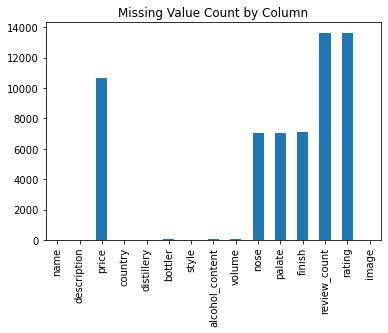

In [111]:
df.isna().sum().plot(kind='bar', title='Missing Value Count by Column')
plt.show()

In [112]:
# Display missing values by percentage
df.isna().sum() / df.shape[0]

name               0.000000
description        0.000000
price              0.560297
country            0.000000
distillery         0.000000
bottler            0.003841
style              0.000000
alcohol_content    0.003841
volume             0.003841
nose               0.369568
palate             0.369620
finish             0.373145
review_count       0.717247
rating             0.717352
image              0.000000
dtype: float64

Majority of the missing values are stemming from the following columns:
- **price**: Some whiskies are collector's edition that price varies and not for sale.
- **nose/palate/finish**: Some whiskies' characteristic is not recorded, however description column may serve details of the whisky during NLP process.
- **review_count/rating**: This suggests that some of the whiskies haven't been reviewed by Master of Malt's users.

There are too many NaNs for review_count and rating columns to give any value; therefore, removing those two columns.

In [113]:
df = df.drop(['review_count', 'rating'], axis=1)

### 2.2 Convert price, alcohol_content, volume from string to float

In [114]:
df['price'] = df[~df['price'].isna()]['price'].apply(lambda price: float(price))
df['alcohol_content'] = df[~df['alcohol_content'].isna()]['alcohol_content'].apply(lambda percentage: float(percentage[:-1]))
df['volume'] = df[~df['volume'].isna()]['volume'].apply(lambda volume: float(volume[:-2]))

### 2.3 Replace NaN values in nose, palate, finish, bottler, alcohol_content,  and volumne columns.

In [115]:
# Replace nose, palate, and finish NaN with description values
df.loc[df['nose'].isna(), 'nose'] = df[df['nose'].isna()]['description']
df.loc[df['palate'].isna(), 'palate'] = df[df['palate'].isna()]['description']
df.loc[df['finish'].isna(), 'finish'] = df[df['finish'].isna()]['description']

In [116]:
# Replace NaN with unknown value for bottler's NaN values
df.loc[df['bottler'].isna(), 'bottler'] = 'unknown'

In [117]:
# Replace alcohol_content with each whisky style's average alcohol_content
styles = df.loc[df['alcohol_content'].isna()]['style'].unique() # Get styles

# Get average alcohol content per style and replace NaN
for style in styles:
    avg_content = round(df[(df['style'] == style) & (~df['alcohol_content'].isna())]['alcohol_content'].mean(), 2)
    df.loc[(df['alcohol_content'].isna()) & (df['style'] == style), 'alcohol_content'] = avg_content

In [118]:
# Same as alcohol_content - replace volumne's NaN with average volume based on style
styles = df.loc[df['volume'].isna()]['style'].unique()

for style in styles:
    avg_volume = round(df[(df['style'] == style) & (~df['volume'].isna())]['volume'].mean(), 2)
    df.loc[(df['volume'].isna()) & (df['style'] == style), 'volume'] = avg_volume

In [119]:
# Display missing values by percentage
df.isna().sum() / df.shape[0]

name               0.000000
description        0.000000
price              0.560297
country            0.000000
distillery         0.000000
bottler            0.000000
style              0.000000
alcohol_content    0.000000
volume             0.000000
nose               0.000000
palate             0.000000
finish             0.000000
image              0.000000
dtype: float64

Allowing price column to have NaN values since averaging based on price will be way off as some goes high as 121k while lowest cost only about 4 dollars.

In [120]:
print(df['price'].max())
print(df['price'].min())

121043.13
4.04


In [121]:
# Lowercase all text values
cols = ['name', 'description', 'country', 'distillery', 'bottler', 'style', 'nose', 'palate', 'finish']

for col in cols:
    df[col] = df[col].str.lower()

## 3. Text Preprocessing

In [127]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Add additional stopword
nlp.Defaults.stop_words.add('-pron-')
nlp.Defaults.stop_words.add('note')

In [131]:
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    
    # Get stop words
    stopwords = spacy.lang.en.stop_words.STOP_WORDS

    # Generate lemmas - remove punctuation, whitespace, and lowercase
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

In [132]:
df['nose'] = df['nose'].apply(preprocess)
df['palate'] = df['palate'].apply(preprocess)
df['finish'] = df['finish'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)

In [133]:
df['nose'][0]

'thick creamy honey spice leather touch cocoa little smoke toasty oak vanilla cream hint butterscotch'

In [134]:
df['palate'][0]

'thick espresso bean winter spice cereal sweetness plenty rye ground ginger almond oil toasty oak little rum'

In [135]:
df['finish'][0]

'long mature cereal toasty oaken spice'

In [136]:
df['description'][0]

'mashbill woodford reserve feature high percentage rye corn rye malt whiskey unusual triple distil low proof enter barrel mature year kentucky bourbon wonderful old fashioned cocktail'

In [137]:
df.head()

,name,description,price,country,distillery,bottler,style,alcohol_content,volume,nose,palate,finish,image
0,woodford reserve kentucky bourbon,mashbill woodford reserve feature high percent...,35.46,american whiskey,woodford reserve,woodford reserve,bourbon whiskey,43.2,70.0,thick creamy honey spice leather touch cocoa l...,thick espresso bean winter spice cereal sweetn...,long mature cereal toasty oaken spice,cdn3.masterofmalt.com/whiskies/p-2813/woodford...
1,woodford reserve double oaked,finally woodford reserve double oake kentucky ...,52.90,american whiskey,woodford reserve,woodford reserve,bourbon whiskey,43.2,70.0,finally woodford reserve double oake kentucky ...,finally woodford reserve double oake kentucky ...,finally woodford reserve double oake kentucky ...,cdn3.masterofmalt.com/whiskies/p-2813/woodford...
2,eagle rare 10 year old,way legendary buffalo trace distillery frankfo...,37.41,american whiskey,eagle rare,eagle rare,bourbon whiskey,45.0,70.0,toasted oak way flame orange peel maple syrup,honey butter bread oily walnut touch red fruit,vanilla oak spice little bit old leather,cdn2.masterofmalt.com/whiskies/p-2813/eagle-ra...
3,sazerac straight rye,whiskey sazerac coffee house new orleans birth...,45.83,american whiskey,sazerac,sazerac,rye whiskey,45.0,70.0,sweet spice stem ginger syrup orange zest fres...,thick spicy palate seville orange marmalade al...,oily spicy finish,cdn2.masterofmalt.com/whiskies/p-2813/sazerac/...
4,evan williams extra aged,popular brand bourbon kentucky produce rich va...,31.01,american whiskey,evan williams,evan williams,bourbon whiskey,43.0,70.0,caramel apple spearmint black pepper light hin...,raisin walnut creamy vanilla core underpinning...,spicy dry cinnamon bark pine nut,cdn3.masterofmalt.com/whiskies/p-2813/evan-wil...


In [138]:
# Save data
df.to_csv('dataset/clean_data.csv')